### Sonar Dataset 

The Sonar Dataset involves the prediction of whether or not an object is a **mine** or a **rock** given the strength of sonar returns at different angles.

__It is a binary (2-class) classification problem__. The number of observations for each class is not balanced. There are 208 observations with 60 input variables and 1 output variable. The variable names are as follows:

    - Sonar returns at different angles
    - Class (M for mine and R for rock)
    
The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 53%. Top results achieve a classification accuracy of approximately 88%.

MORE INFORMATION --> https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

DOWNLOAD -- > https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data


In [29]:
# !curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

In [30]:
# !mkdir data 

In [31]:
# !mv sonar.all-data data/

In [32]:
# !head -n 1 data/sonar.all-data

In [33]:
# !cat data/sonar.all-data | wc -l 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

## Step 1: Load the Data and aswering the question

In [2]:
Sonar_DF = pd.read_csv('data/sonar.all-data', header=None)

In [3]:
Sonar_DF

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
dictionary = {i:'Feature_{}'.format(i) for i in range(60)}
dictionary[60]='Class'

In [5]:
# dictionary

In [6]:
Sonar_DF.rename(columns=dictionary,inplace=True)

In [7]:
Sonar_DF

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


## Step 2: Check data for problems 

In [8]:
Sonar_DF.isna().sum().sum()

0

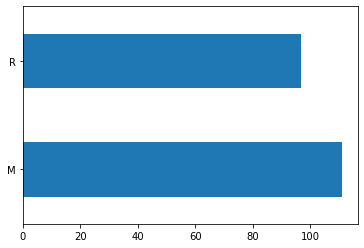

In [9]:
Sonar_DF.Class.value_counts().plot(kind='barh');

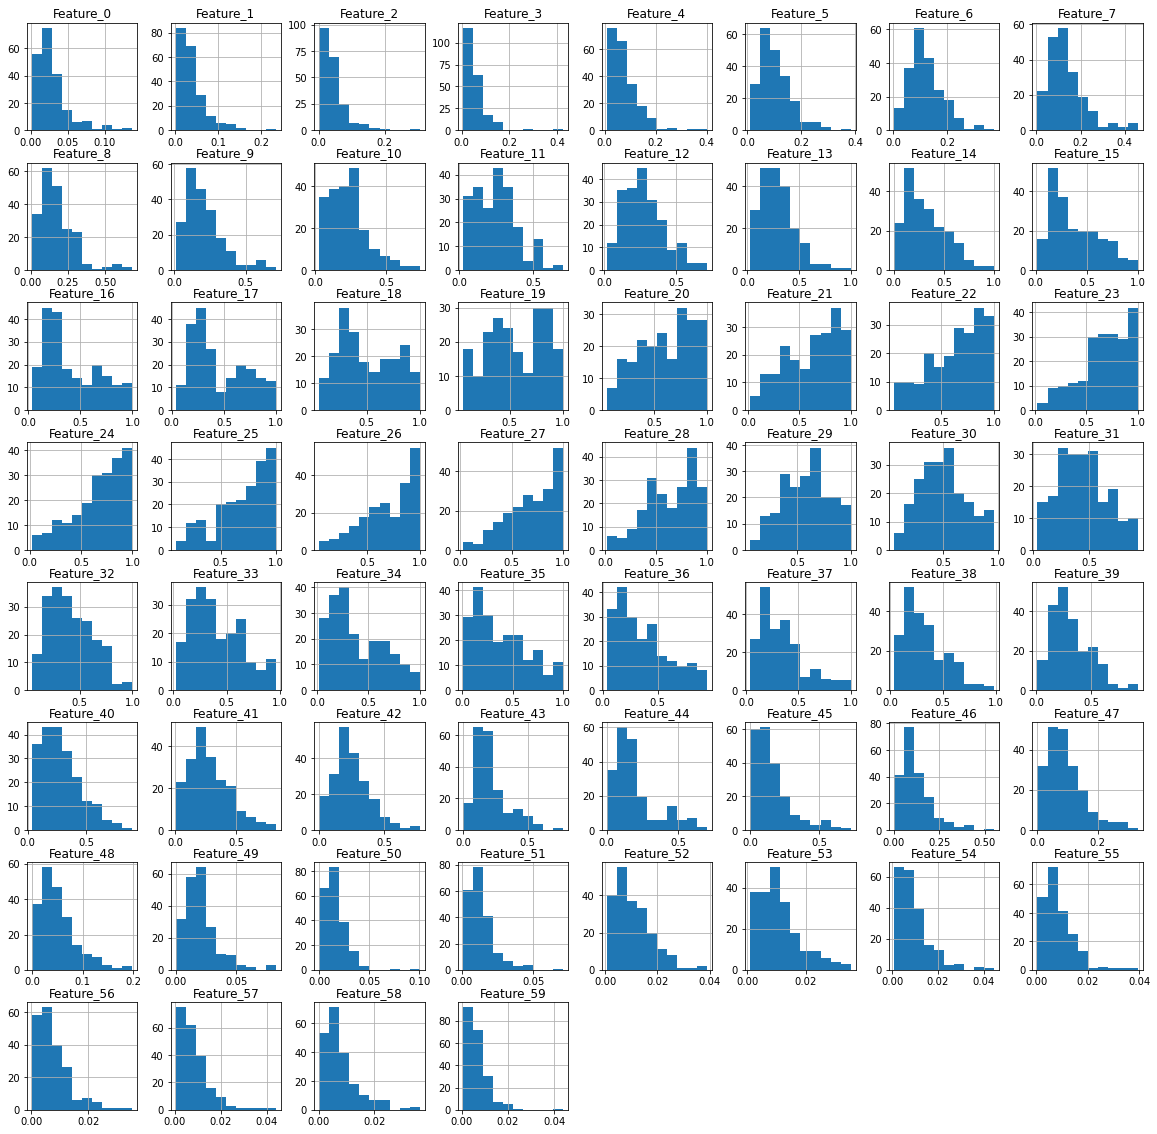

In [10]:
Sonar_DF.iloc[:,:-1].hist(figsize=(20,20));

In [11]:
Sonar_DF.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## Step 3: Tidying the data


## Step 4: Exploratory analysis

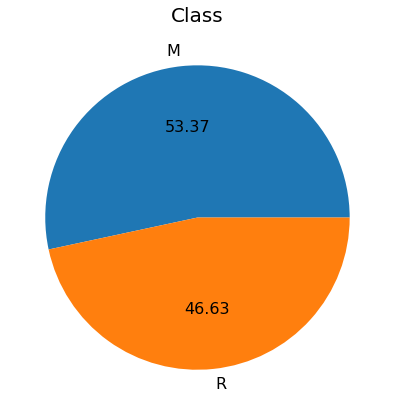

In [12]:
plt.figure(figsize=(10,7))
Sonar_DF.groupby('Class').size().plot.pie(autopct='%.2f', textprops={'fontsize': 16})
plt.title('Class',fontsize=20)
plt.ylabel('');

In [13]:
Sonar_DF.groupby('Class').std()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
Class,,,,,,,,,,,,,,,,,,,,,
M,0.027074,0.037840,0.044014,0.054497,0.059790,0.052620,0.058179,0.087190,0.122237,0.137366,...,0.013528,0.010770,0.007658,0.008463,0.008404,0.006403,0.005884,0.007460,0.006917,0.005958
R,0.014687,0.024011,0.029101,0.031172,0.047217,0.065025,0.065155,0.079772,0.099887,0.113151,...,0.008632,0.007109,0.006174,0.005389,0.005137,0.004773,0.005702,0.004841,0.005114,0.003669


In [14]:
Sonar_DF.groupby('Class').mean()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
Class,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


<AxesSubplot:>

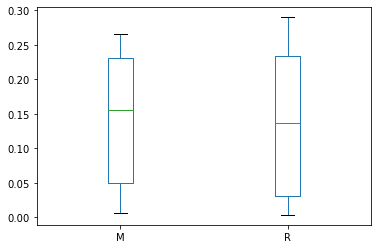

In [15]:
Sonar_DF.groupby('Class').std().T.plot(kind='box')

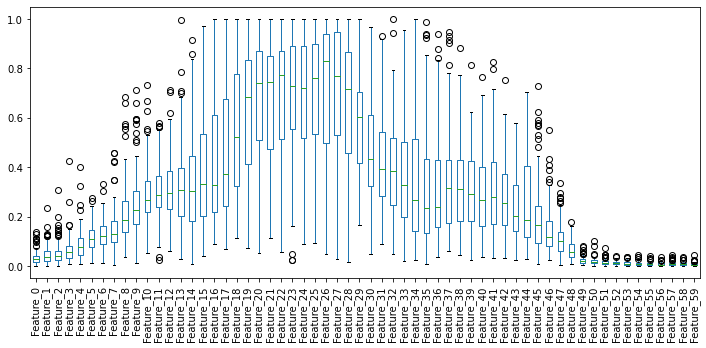

In [16]:
Sonar_DF.query('Class == "M"').iloc[:,:-1].plot(kind='box', figsize=(12,5))
plt.xticks(rotation = 90);

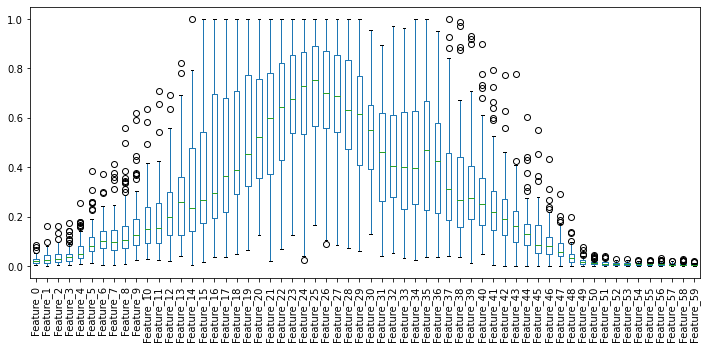

In [17]:
Sonar_DF.query('Class == "R"').iloc[:,:-1].plot(kind='box', figsize=(12,5))
plt.xticks(rotation = 90);

## Step 5:  Building the classifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Sonar_DF.iloc[:,:-1], 
                                                    Sonar_DF['Class'], 
                                                    random_state=42, test_size=0.3)

In [19]:
svc = SVC(C=10,random_state=0)
svc.fit(X_train,y_train)
svc_predictions = svc.predict(X_test)
print(accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))

0.9206349206349206
              precision    recall  f1-score   support

           M       0.89      0.97      0.93        35
           R       0.96      0.86      0.91        28

    accuracy                           0.92        63
   macro avg       0.93      0.91      0.92        63
weighted avg       0.92      0.92      0.92        63



In [20]:
svc_CM = confusion_matrix(y_test, svc_predictions)
svc_CM_DF = pd.DataFrame(svc_CM, columns=np.unique(y_test), index = np.unique(y_test))
svc_CM_DF.index.name = 'Actual'
svc_CM_DF.columns.name = 'Predicted'

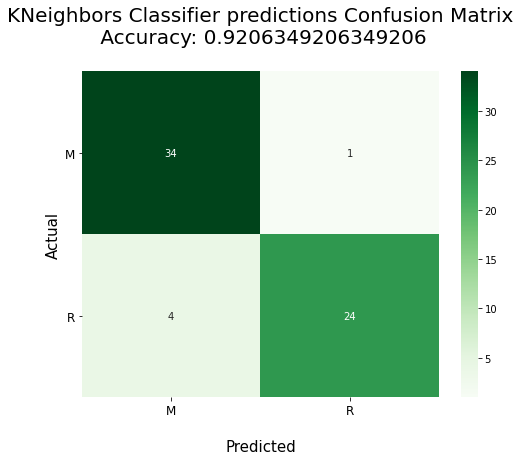

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(svc_CM_DF, fmt='g', annot=True, cmap='Greens')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, svc_predictions)),fontsize=20)
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

In [22]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    neigh_predictions = neigh.predict(X_test)
    print('No# of neighbors: {} -->'.format(i), 'Test Acc: {}'.format(accuracy_score(y_test, neigh_predictions)))

No# of neighbors: 1 --> Test Acc: 0.9047619047619048
No# of neighbors: 2 --> Test Acc: 0.8412698412698413
No# of neighbors: 3 --> Test Acc: 0.8888888888888888
No# of neighbors: 4 --> Test Acc: 0.8571428571428571
No# of neighbors: 5 --> Test Acc: 0.8412698412698413
No# of neighbors: 6 --> Test Acc: 0.7301587301587301
No# of neighbors: 7 --> Test Acc: 0.746031746031746
No# of neighbors: 8 --> Test Acc: 0.7301587301587301
No# of neighbors: 9 --> Test Acc: 0.7301587301587301
No# of neighbors: 10 --> Test Acc: 0.746031746031746
No# of neighbors: 11 --> Test Acc: 0.6984126984126984
No# of neighbors: 12 --> Test Acc: 0.6825396825396826
No# of neighbors: 13 --> Test Acc: 0.6984126984126984
No# of neighbors: 14 --> Test Acc: 0.6825396825396826


In [23]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
neigh_predictions = neigh.predict(X_test)
print(accuracy_score(neigh_predictions, y_test))
print(classification_report(y_test, neigh_predictions))

0.9047619047619048
              precision    recall  f1-score   support

           M       0.89      0.94      0.92        35
           R       0.92      0.86      0.89        28

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



In [24]:
neigh_CM = confusion_matrix(y_test, neigh_predictions)
neigh_CM_DF = pd.DataFrame(neigh_CM, columns=np.unique(y_test), index = np.unique(y_test))
neigh_CM_DF.index.name = 'Actual'
neigh_CM_DF.columns.name = 'Predicted'

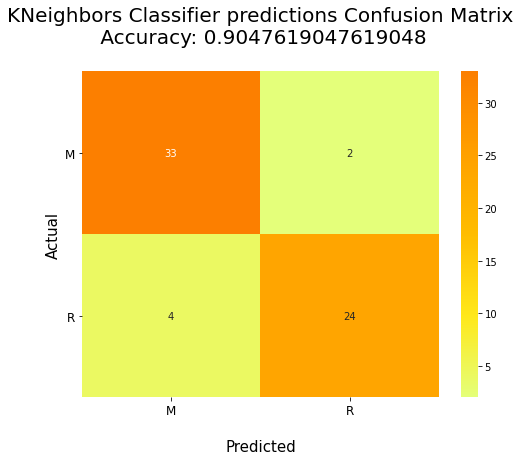

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(neigh_CM_DF, fmt='g', annot=True, cmap='Wistia')
plt.title('KNeighbors Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, neigh_predictions)),fontsize=20)
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

### Random Forest Classifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = dict(n_estimators=range(12,15), max_features=range(30,35),max_depth=range(5,7),random_state=range(30,40))

grid_search = GridSearchCV(RandomForestClassifier(),
                               param_grid=param_grid,
                          cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

In [55]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 32, 'n_estimators': 12, 'random_state': 37}

In [56]:
clf.score(X_test, y_test)

0.7777777777777778

In [398]:
# Create the classifier

maxx = 0


for i in range(12,15):
    for j in range(30,35):
        for k in range(5,7):
            for n in range(30,40):
                Randomforest_classifier = RandomForestClassifier(n_estimators=i, max_features=j,max_depth=k, random_state=n)
                Randomforest_classifier.fit(X_train, y_train)
                X = Randomforest_classifier.score(X_test, y_test)
                if X>maxx:
                    maxx = X
                    ne = i
                    mf = j
                    md = k
                    rn = n
    print("i = {}".format(i))

i = 12
i = 13
i = 14


In [400]:
maxx, ne, mf, md, rn

(0.9365079365079365, 13, 32, 5, 31)

In [401]:
RFC = RandomForestClassifier(n_estimators=13, max_features=32,max_depth=5,random_state=31)
RFC.fit(X_train, y_train)
RFC_predictions = RFC.predict(X_test)
print(accuracy_score(RFC_predictions, y_test))
print(classification_report(y_test, RFC_predictions))

0.9365079365079365
              precision    recall  f1-score   support

           M       0.92      0.97      0.94        35
           R       0.96      0.89      0.93        28

    accuracy                           0.94        63
   macro avg       0.94      0.93      0.94        63
weighted avg       0.94      0.94      0.94        63



In [402]:
RFC_CM = confusion_matrix(y_test, RFC_predictions)
RFC_CM_DF = pd.DataFrame(RFC_CM, columns=np.unique(y_test), index = np.unique(y_test))
RFC_CM_DF.index.name = 'Actual'
RFC_CM_DF.columns.name = 'Predicted'

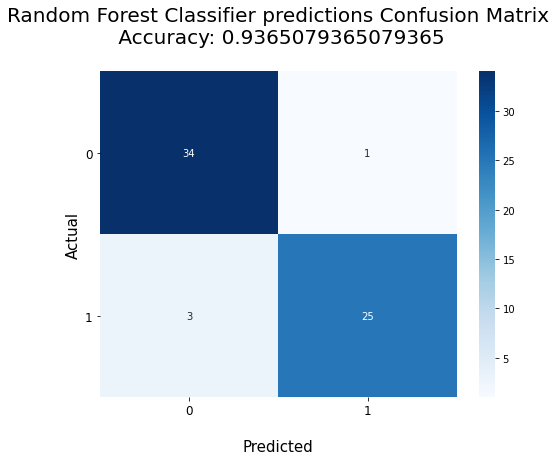

In [403]:
plt.figure(figsize=(8,6))
sns.heatmap(RFC_CM, fmt='g', annot=True, cmap='Blues')
plt.title('Random Forest Classifier predictions Confusion Matrix\n Accuracy: {}\n'.format(accuracy_score(y_test, RFC_predictions)),fontsize=20)
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.xticks(ha='center',fontsize=12)
plt.yticks(fontsize=12, rotation =0);

## Step 6:  Reproducibility